In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
# sns.set(style='whitegrid')

# Load dataset


df = pd.read_csv("Sales.csv", encoding='ISO-8859-1')

# Display first few rows
df.head(3)

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


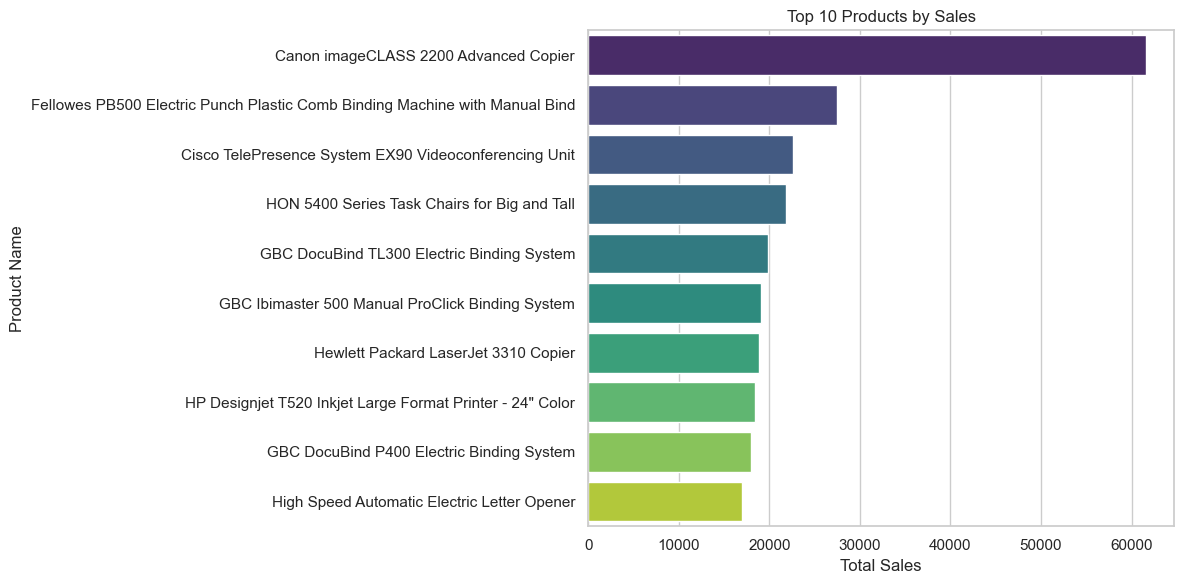

In [10]:
# Bar charts for top products
# Bar Chart – Top 10 Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products_df = top_products.reset_index()
top_products_df.columns = ['Product Name', 'Sales']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products_df, x='Sales', y='Product Name', hue='Product Name', palette='viridis', legend=False)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


In [ ]:
# The top-selling products generate significantly more revenue compared to others. A few products dominate the sales chart.
# The company should continue stocking and promoting these top-selling products, while also analyzing low-performing items 
# to consider discounts, bundling, or phase-out strategies. 

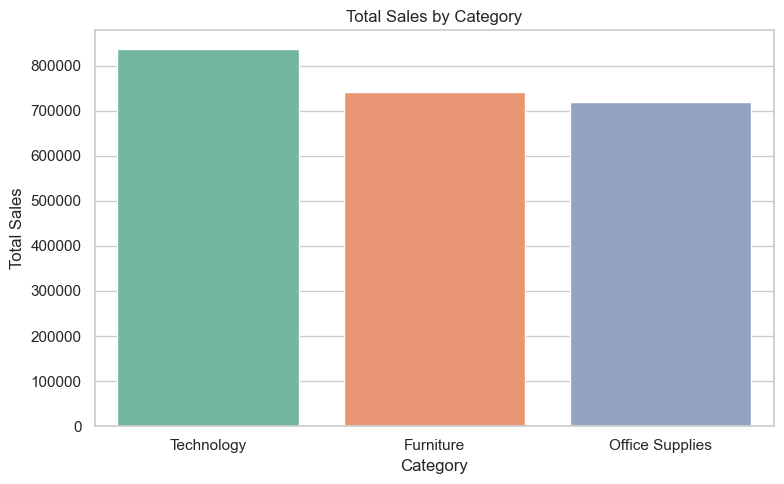

In [14]:
# Total Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x='Category', y='Sales', hue='Category', palette='Set2', legend=False)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


In [ ]:
# Technology leads in total sales, followed by Furniture and then Office Supplies.
# Technology products are the primary revenue drivers. Marketing and inventory strategies should prioritize this category. 
# However, consider promotional offers to uplift sales in the Office Supplies segment, which lags behind.

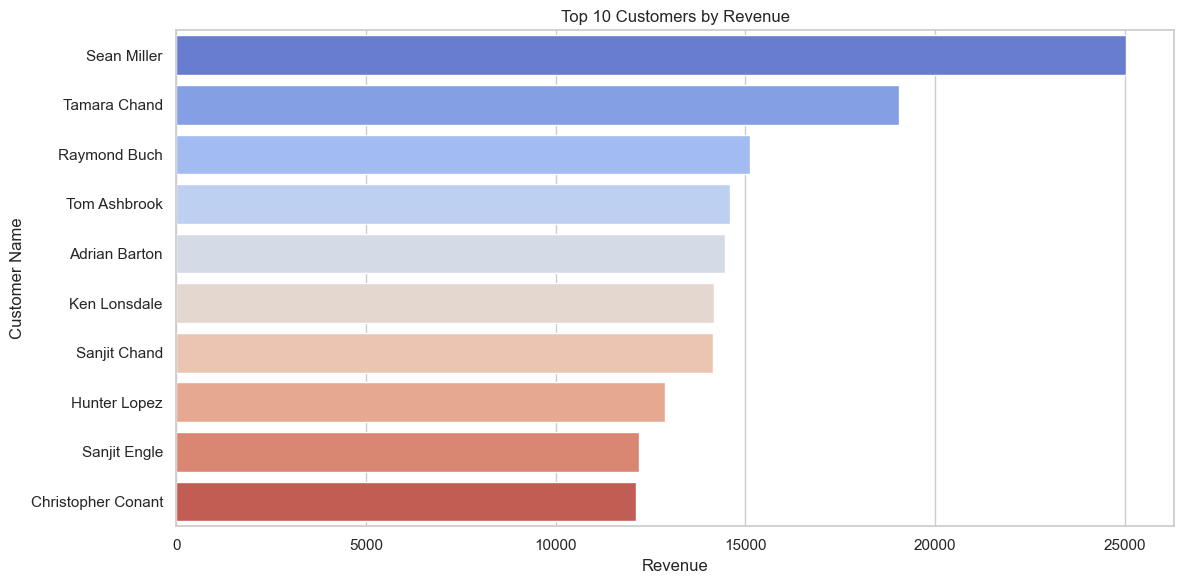

In [15]:
# Top Customers by Revenue
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='Sales', y='Customer Name', hue='Customer Name', palette='coolwarm', legend=False)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

In [ ]:
# A small group of customers generates a large portion of revenue. These are likely loyal, high-value customers.
# Focus on retaining these top customers through loyalty programs, personalized offers, or early access to new products. 
# Also, analyze their buying behavior to find similar customer profiles for upselling.

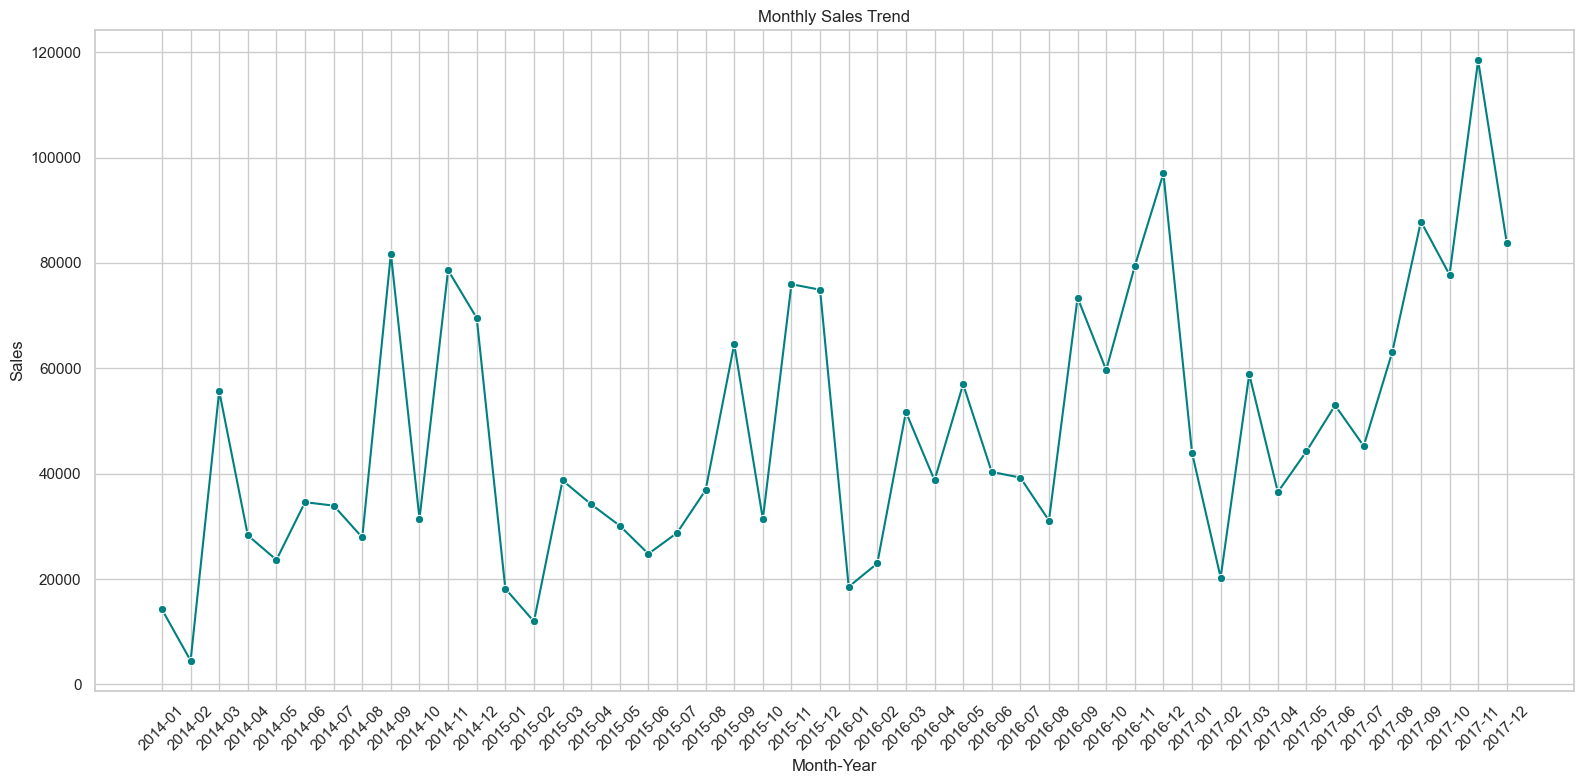

In [17]:
# Line charts for sales trends

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month-Year'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()
monthly_sales['Month-Year'] = monthly_sales['Month-Year'].astype(str)

plt.figure(figsize=(16, 8))
sns.lineplot(data=monthly_sales, x='Month-Year', y='Sales', marker='o', color='teal')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# There are noticeable peaks in certain months (e.g., November and December), suggesting seasonality or end-of-year promotions.
# The company experiences higher sales during specific periods (likely due to holidays or festivals). 
# Focused campaigns around these months can maximize revenue, while off-season months could benefit from targeted discounts or new launches.

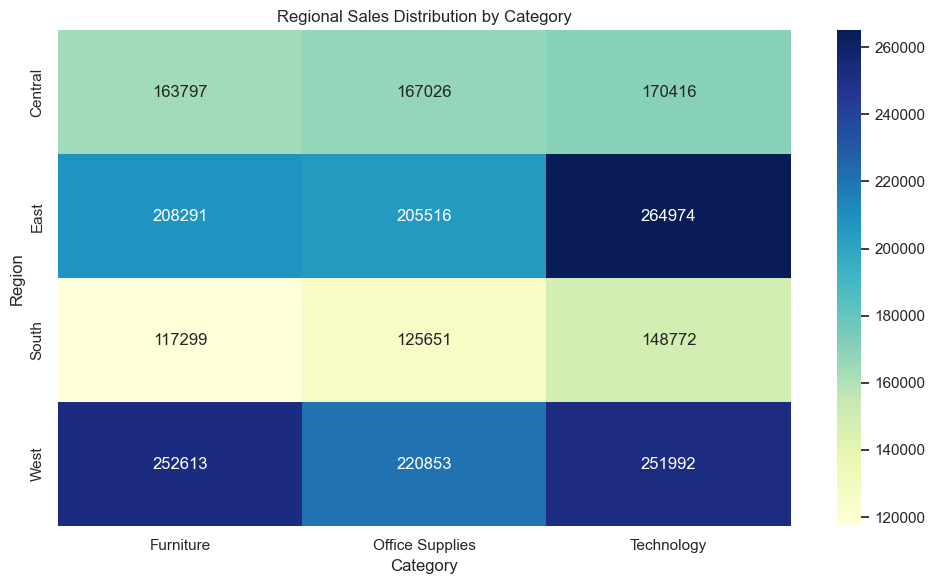

In [18]:
# Heatmaps for regional sales distribution

heatmap_data = df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Regional Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


In [ ]:
# The West and East regions show stronger sales across all categories, especially in Technology and Furniture. 
# The South and Central regions contribute relatively less.
# Regional sales strategies should be customized. While West and East are mature markets, the South and Central regions 
# may require localized promotions, improved logistics, or better customer outreach.